In [36]:
try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


## MNIST

In [2]:
# Load in the data
mnist = tf.keras.datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255., X_test / 255.

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# Build the model
i = Input(shape=X_train.shape[-2:])
x = LSTM(128)(i)
x = Dense(len(set(y_train.flatten())), activation='softmax')(x)

model = Model(i, x)

In [7]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.3433 - accuracy: 0.8877 - val_loss: 0.1308 - val_accuracy: 0.9590
Epoch 2/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.1001 - accuracy: 0.9701 - val_loss: 0.0973 - val_accuracy: 0.9708
Epoch 3/10
60000/60000 [==============================] - 9s 142us/sample - loss: 0.0700 - accuracy: 0.9785 - val_loss: 0.0607 - val_accuracy: 0.9819
Epoch 4/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0544 - accuracy: 0.9835 - val_loss: 0.0665 - val_accuracy: 0.9785
Epoch 5/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0437 - accuracy: 0.9867 - val_loss: 0.0470 - val_accuracy: 0.9871
Epoch 6/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0374 - accuracy: 0.9886 - val_loss: 0.0470 - val_accuracy: 0.9859
Epoch 7/10
60000/60000 [=========================

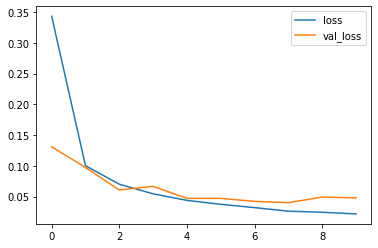

In [8]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

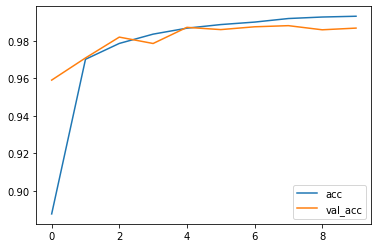

In [9]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[ 973    0    0    0    0    0    6    1    0    0]
 [   0 1133    0    0    0    0    2    0    0    0]
 [   3    0 1023    1    2    0    1    2    0    0]
 [   0    0    2 1000    1    4    0    0    3    0]
 [   0    0    0    0  965    0    6    0    0   11]
 [   4    0    0    5    2  870    5    0    5    1]
 [   1    2    0    0    1    1  953    0    0    0]
 [   0    6    6    3    3    0    1 1004    1    4]
 [  11    2   12    1    0    1    0    0  945    2]
 [   0    0    2    0    5    1    0    0    0 1001]]


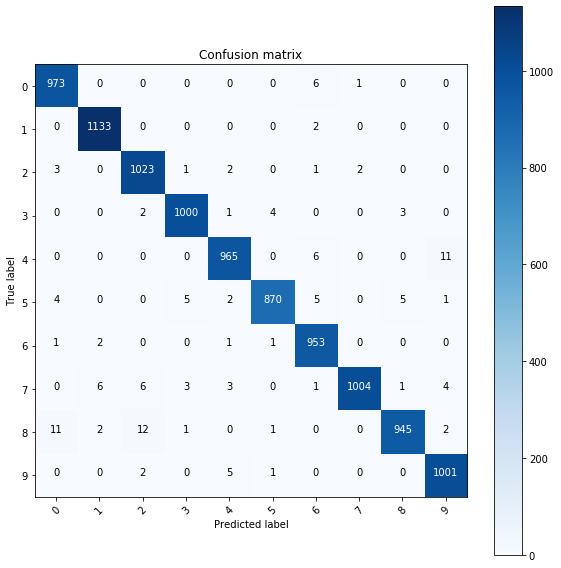

In [11]:
# Plot confusion matrix
from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

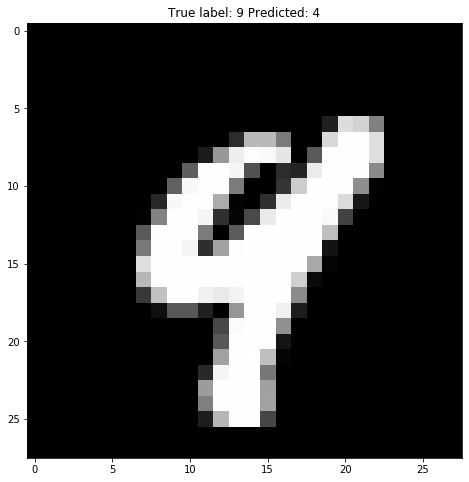

In [12]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

## CIFAR 10

In [0]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_test = X_train / 255., X_test / 255.

In [0]:
def grayscale(data, dtype='float32'):
    # luma coding weighted average in video systems
    r, g, b = np.asarray(.3, dtype=dtype), np.asarray(.59, dtype=dtype), np.asarray(.11, dtype=dtype)
    rst = r * data[:, :, :, 0] + g * data[:, :, :, 1] + b * data[:, :, :, 2]
    # add channel dimension
    rst = np.expand_dims(rst, axis=3)
    return rst

X_train = grayscale(X_train)
X_test = grayscale(X_test)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 32, 32)
X_test = X_test.reshape(X_test.shape[0], 32, 32)

In [0]:
# Build the model
i = Input(shape=X_train.shape[-2:])
x = GRU(128, return_sequences=True)(i)
#x = tf.keras.layers.Dropout(.4)(x)
#x = GRU(64, return_sequences=True)(x)
#x = tf.keras.layers.Dropout(.4)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(len(set(y_train.flatten())), activation='softmax')(x)

model = Model(i, x)

In [78]:
# Compile and train
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 195us/sample - loss: 1.9082 - accuracy: 0.3032 - val_loss: 1.7432 - val_accuracy: 0.3779
Epoch 2/50
50000/50000 [==============================] - 8s 169us/sample - loss: 1.6441 - accuracy: 0.4068 - val_loss: 1.5719 - val_accuracy: 0.4384
Epoch 3/50
50000/50000 [==============================] - 8s 167us/sample - loss: 1.5273 - accuracy: 0.4535 - val_loss: 1.4920 - val_accuracy: 0.4684
Epoch 4/50
50000/50000 [==============================] - 8s 167us/sample - loss: 1.4541 - accuracy: 0.4813 - val_loss: 1.4737 - val_accuracy: 0.4692
Epoch 5/50
50000/50000 [==============================] - 8s 169us/sample - loss: 1.3988 - accuracy: 0.4988 - val_loss: 1.4143 - val_accuracy: 0.4971
Epoch 6/50
50000/50000 [==============================] - 8s 168us/sample - loss: 1.3567 - accuracy: 0.5148 - val_loss: 1.3895 - val_accuracy: 0.5119
Epoch 7/50
50000/50000 [=========================

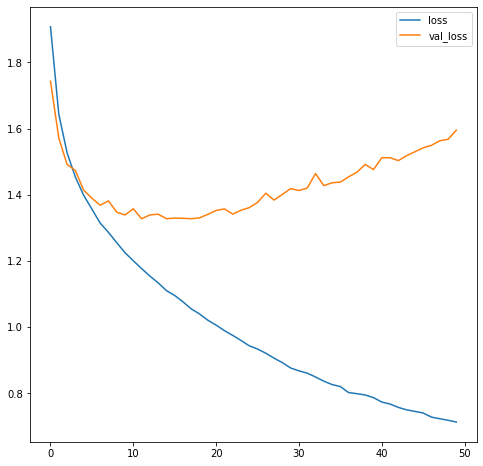

In [79]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

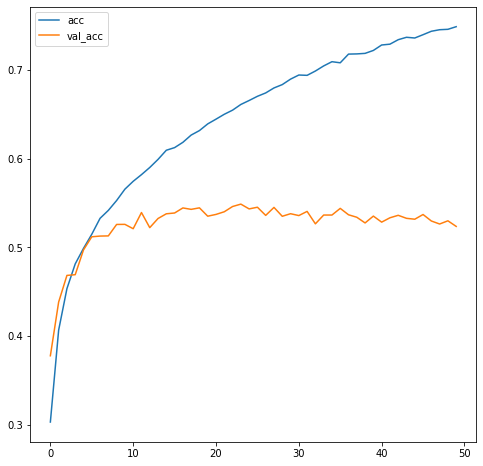

In [80]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()